In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import _pickle as pkl
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Configuração

%matplotlib inline

pd.set_option('display.max_columns', 100)

cols_scouts_def = ['CA','CV','DD','DP','FC','GC','GS','RB','SG'] # alphabetical order
cols_scouts_atk = ['A','FD','FF','FS','FT','G','I','PE','PP'] # alphabetical order
cols_scouts = cols_scouts_def + cols_scouts_atk

scouts_weights = np.array([-2.0, -5.0, 3.0, 7.0, -0.5, -6.0, -2.0, 1.7, 5.0, 5.0, 1.0, 0.7, 0.5, 3.5, 8.0, -0.5, -0.3, -3.5])

ROUND_TO_PREDICT = 29

df = pd.read_csv('/home/matheus/dev/tcc/tcc/data/dados_agregados.csv')
print(df.shape)
df.head(10)

(43821, 77)


,AtletaID,Rodada,ClubeID,Participou,Posicao,Jogos,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,ano,Apelido,Status,avg.Points,avg.last05,avg.FS,avg.FS.l05,avg.PE,avg.PE.l05,avg.A,avg.A.l05,avg.FT,avg.FT.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.G,avg.G.l05,avg.I,avg.I.l05,avg.PP,avg.PP.l05,avg.RB,avg.RB.l05,avg.FC,avg.FC.l05,avg.GC,avg.GC.l05,avg.CA,avg.CV.l05,avg.SG,avg.SG.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.GS,avg.GS.l05,risk_points,mes,dia,home.score.x,away.score.x,pred.home.score,pred.away.score,home.attack,home.defend,variable
0,36443,1,285.0,True,gol,1.0,5.0,5.00,10.60,1.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2014,NaN,NaN,2.500000,1.00,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,0.000000,1.0,0.500000,1.0,0.000000,1.0,0.0,1.0,0.000000,1.0,1.000000,4.0,19.0,1.0,0.0,NaN,NaN,NaN,NaN,home.team
1,36443,2,285.0,True,gol,2.0,-3.0,1.00,8.27,-2.33,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2014,NaN,NaN,0.666667,1.00,0.666667,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,0.000000,1.0,0.333333,1.0,0.000000,1.0,0.0,1.0,0.666667,1.0,1.000000,4.0,27.0,2.0,2.0,NaN,NaN,NaN,NaN,away.team
2,36443,3,285.0,True,gol,3.0,-2.6,-0.20,6.81,-1.46,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2014,NaN,NaN,-0.150000,1.00,0.500000,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,0.000000,1.0,0.250000,1.0,0.000000,1.0,0.0,1.0,0.750000,1.0,1.000000,5.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,home.team
3,36443,4,285.0,True,gol,4.0,4.0,0.85,7.96,1.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2014,NaN,NaN,0.680000,0.68,0.400000,0.4,0.400000,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.200000,0.2,0.400000,0.4,0.0,0.0,0.800000,0.8,1.000000,5.0,10.0,2.0,1.0,NaN,NaN,NaN,NaN,home.team
4,36443,5,285.0,True,gol,5.0,5.0,1.68,8.61,0.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2014,NaN,NaN,1.400000,1.68,0.333333,0.4,0.333333,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.333333,0.4,0.333333,0.4,0.0,0.0,0.666667,0.8,1.000000,5.0,18.0,0.0,0.0,NaN,NaN,NaN,NaN,away.team
5,36443,6,285.0,True,gol,6.0,1.2,1.60,8.02,-0.59,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,2,0,1,2014,NaN,NaN,1.371429,0.92,0.285714,0.4,0.428571,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.2,0.0,0.0,0.142857,0.0,0.285714,0.2,0.571429,0.8,0.0,0.0,0.714286,1.0,1.000000,5.0,21.0,1.0,1.0,NaN,NaN,NaN,NaN,away.team
6,36443,7,285.0,True,gol,7.0,-3.3,0.90,6.75,-1.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,2014,NaN,NaN,0.787500,0.86,0.250000,0.0,0.500000,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.2,0.0,0.0,0.125000,0.0,0.250000,0.2,0.625000,1.0,0.0,0.0,1.000000,1.2,1.000000,5.0,25.0,1.0,3.0,NaN,NaN,NaN,NaN,home.team
7,36443,8,285.0,True,gol,8.0,3.0,1.16,7.55,0.80,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2014,NaN,NaN,1.033333,1.98,0.222222,0.0,0.444444,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.2,0.0,0.0,0.222222,0.0,0.333333,0.4,0.555556,1.0,0.0,0.0,0.888889,1.0,1.000000,5.0,28.0,2.0,0.0,NaN,NaN,NaN,NaN,home.team
8,36443,9,285.0,True,gol,9.0,-1.5,0.86,6.71,-0.84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2014,NaN,NaN,0.780000,0.88,0.300000,0.2,0.400000,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.2,0.0,0.0,0.200000,0.0,0.300000,0.4,0.500000,0.6,0.0,0.0,0.900000,1.0,3.320910,6.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,away.team
9,36443,10,285.0,True,gol,10.0,-4.0,0.37,6.01,-0.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2014,NaN,NaN,0.345455,-0.92,0.272727,0.2,0.363636,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.2,0.0,0.0,0.181818,0.0,0.272727,0.2,0.454545,0.6,0.0,0.0,1.000000,1.4,3.649901,7.0,17.0,2.0,1.0,NaN,NaN,NaN,NaN,away.team


In [ ]:

#Processo de limpeza dos dados

print("Dimensões originais dos dados: ", df.shape)

# remove todas as linhas cujo scouts são NANs
df_clean = df.dropna(how='all', subset=cols_scouts)
print('qtde. de jogadores com scouts: ', df_clean.shape[0])

# remove todas as linhas com rodada == 0
df_clean = df_clean[df_clean['Rodada'] > 0]
print("qtde. de linhas após eliminação da rodada 0: ", df_clean.shape[0])

# remove técnicos e jogadores sem posição
df_clean = df_clean[(df_clean['Posicao'] != "tec") & (~df_clean['Posicao'].isnull())]
print("qtde. de linhas com posições válidas: ", df_clean.shape[0])

# remove todos os jogadores que não participaram de alguma rodada
df_clean = df_clean[(df_clean['Participou'] == True) | (df_clean['PrecoVariacao'] != 0)]
print("qtde. de linhas com jogadores que participaram de alguma rodada: ", df_clean.shape[0])

# altera os Status = NAN para 'Provável'
df_clean.loc[df_clean.Status.isnull(), 'Status'] = 'Provável'

# atualiza nomes dos jogadores sem ids e remove jogadores sem nome
df_ids =  df.groupby('AtletaID')['Apelido'].unique()
dict_ids = dict(zip(df_ids.index, [str(v[-1]) for v in df_ids.values]))
dict_ids = {k:v for k,v in dict_ids.items() if v != 'nan'}
df_clean['Apelido'] = df_clean['AtletaID'].map(dict_ids)
df_clean = df_clean[~df_clean['Apelido'].isnull()]
print("qtde. de jogadores com nome: ", df_clean.shape[0])

# preenche NANs restantes com zeros (verificado antes!)
df_clean.fillna(value=0, inplace=True)

print("Dimensão dos dados após as limpezas: ", df_clean.shape)
df_clean.head(10)

Dimensões originais dos dados:  (43821, 77)
qtde. de jogadores com scouts:  43821
qtde. de linhas após eliminação da rodada 0:  43821
qtde. de linhas com posições válidas:  33045
qtde. de linhas com jogadores que participaram de alguma rodada:  33045
qtde. de jogadores com nome:  22839
Dimensão dos dados após as limpezas:  (22839, 77)


,AtletaID,Rodada,ClubeID,Participou,Posicao,Jogos,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,ano,Apelido,Status,avg.Points,avg.last05,avg.FS,avg.FS.l05,avg.PE,avg.PE.l05,avg.A,avg.A.l05,avg.FT,avg.FT.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.G,avg.G.l05,avg.I,avg.I.l05,avg.PP,avg.PP.l05,avg.RB,avg.RB.l05,avg.FC,avg.FC.l05,avg.GC,avg.GC.l05,avg.CA,avg.CV.l05,avg.SG,avg.SG.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.GS,avg.GS.l05,risk_points,mes,dia,home.score.x,away.score.x,pred.home.score,pred.away.score,home.attack,home.defend,variable
53,36540,1,285.0,True,zag,1.0,2.0,2.00,12.88,-2.12,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,2014,Juan,Provável,1.000000,1.00,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.000000,1.0,0.0,1.0,0.500000,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,4.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,home.team
54,36540,2,285.0,True,zag,2.0,3.4,2.70,12.04,-0.84,1,4,0,0,1,1,0,0,0,2,2,0,0,0,0,0,0,0,2014,Juan,Provável,1.800000,1.00,0.333333,1.0,1.333333,1.0,0.000000,1.0,0.0,1.0,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.666667,1.0,1.333333,1.0,0.0,1.0,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,4.0,27.0,2.0,2.0,0.0,0.0,0.0,0.0,away.team
55,36540,3,285.0,True,zag,3.0,0.1,1.83,10.85,-1.19,4,2,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,2014,Juan,Provável,1.375000,1.00,1.250000,1.0,1.500000,1.0,0.000000,1.0,0.0,1.0,0.250000,1.0,0.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.750000,1.0,1.500000,1.0,0.0,1.0,0.500000,1.0,0.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,5.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,home.team
56,36540,4,285.0,True,zag,4.0,0.9,1.60,10.61,-0.24,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,Juan,Provável,1.280000,1.28,1.200000,1.2,1.600000,1.6,0.000000,0.0,0.0,0.0,0.400000,0.4,0.200000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.6,1.200000,1.2,0.0,0.0,0.400000,0.0,0.200000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,5.0,10.0,2.0,1.0,0.0,0.0,0.0,0.0,home.team
57,36540,5,285.0,True,zag,5.0,1.2,1.52,10.45,-0.16,0,0,0,0,0,1,0,0,0,0,5,0,1,0,1,0,0,0,2014,Juan,Provável,1.266667,1.52,1.000000,1.2,1.333333,1.6,0.000000,0.0,0.0,0.0,0.333333,0.4,0.333333,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.6,1.833333,2.2,0.0,0.0,0.500000,0.0,0.333333,0.4,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,5.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,away.team
58,36540,7,285.0,True,zag,6.0,1.9,1.58,10.14,-0.31,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2014,Juan,Provável,1.187500,0.82,0.875000,1.2,1.000000,0.8,0.000000,0.0,0.0,0.0,0.250000,0.2,0.500000,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.375000,0.2,1.375000,1.4,0.0,0.0,0.375000,0.0,0.250000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,5.0,25.0,1.0,3.0,0.0,0.0,0.0,0.0,home.team
59,36540,8,285.0,True,zag,7.0,10.7,2.88,11.87,1.73,2,2,0,0,0,1,0,0,0,3,1,0,0,0,1,0,0,0,2014,Juan,Provável,2.244444,2.94,1.000000,0.8,1.111111,0.8,0.000000,0.0,0.0,0.0,0.222222,0.2,0.555556,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.6,1.333333,1.2,0.0,0.0,0.333333,0.0,0.333333,0.4,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,5.0,28.0,2.0,0.0,0.0,0.0,0.0,0.0,home.team
60,36540,9,285.0,True,zag,8.0,4.1,3.03,11.20,-0.67,1,1,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,2014,Juan,Provável,2.430000,3.58,1.000000,0.8,1.100000,0.6,0.000000,0.0,0.0,0.0,0.300000,0.2,0.500000,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,1.0,1.300000,1.4,0.0,0.0,0.300000,0.0,0.300000,0.4,0.0,0.0,0.0,0.0,0.0,0.0,3.226298,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,away.team
61,36540,10,285.0,True,zag,9.0,0.4,2.74,10.70,-0.50,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2014,Juan,Provável,2.245455,3.42,0.909091,0.8,1.090909,0.8,0.000000,0.0,0.0,0.0,0.272727,0.2,0.545455,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,1.0,1.181818,0.4,0.0,0.0,0.272727,0.0,0.272727,0.2,0.0,0.0,0.0,0.0,0.0,0.0,3.195153,7.0,17.0,2.0,1.0,0.0,0.0,0.0,0.0,away.team
62,36540,11,285.0,True,zag,10.0,10.0,3.47,12.69,1.99,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2014,Juan,Provável,2.891667,5.42,0.833333,0.8,1.000000,0.8,0.083333,0.2,0.0,0.0,0.250000,0.2,0.500000,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,1.0,

In [3]:
#Carregado dados de 2018 que são distibuidos em arquivos csv separados
rounds_2018 = [];

rounds_2018.append(pd.read_csv('./data/2018/rodada-1.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-2.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-3.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-4.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-5.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-6.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-7.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-8.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-9.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-10.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-11.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-12.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-13.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-14.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-15.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-16.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-17.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-18.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-19.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-20.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-21.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-22.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-23.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-24.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-25.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-26.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-27.csv'))
rounds_2018.append(pd.read_csv('./data/2018/rodada-28.csv'))

df_2018 = pd.concat(rounds_2018, sort=False)
print('número de registros 2018:', df_2018.shape[0])
df_2018.head(10)

número de registros 2018: 22540


,Unnamed: 0,atletas.nome,atletas.slug,atletas.apelido,atletas.foto,atletas.atleta_id,atletas.rodada_id,atletas.clube_id,atletas.posicao_id,atletas.status_id,atletas.pontos_num,atletas.preco_num,atletas.variacao_num,atletas.media_num,atletas.clube.id.full.name,FC,FD,FF,FS,G,I,RB,CA,PE,A,SG,DD,FT,GS,CV,GC,PP,DP
0,1,Matheus Ferraz Pereira,matheus-ferraz,Matheus Ferraz,https://s.glbimg.com/es/sde/f/2018/03/17/6d461...,38632,1,AME,zag,Nulo,0.0,6.00,0.00,0.0,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Willian Lanes de Lima,lima,Lima,https://s.glbimg.com/es/sde/f/2018/03/17/3d9ef...,38506,1,AME,zag,Nulo,0.0,5.00,0.00,0.0,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rómulo Otero Vásquez,otero,Otero,https://s.glbimg.com/es/sde/f/2017/04/03/9fe40...,83004,1,ATL,mei,Provável,16.5,14.81,9.81,16.5,Atlético-MG,1.0,2.0,2.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Diego Ribas da Cunha,diego,Diego,https://s.glbimg.com/es/sde/f/2017/08/16/3ba37...,38909,1,FLA,mei,Provável,0.8,10.89,-4.11,0.8,Flamengo,3.0,NaN,1.0,8.0,NaN,1.0,1.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Rodrigo Eduardo Costa Marinho,rodriguinho,Rodriguinho,https://s.glbimg.com/es/sde/f/2018/03/20/c125f...,61033,1,COR,mei,Provável,16.5,23.08,6.08,16.5,Corinthians,1.0,NaN,NaN,2.0,2.0,NaN,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Rafael Martiniano de Miranda Moura,rafael-moura,Rafael Moura,https://s.glbimg.com/es/sde/f/2018/03/17/c92fb...,37655,1,AME,ata,Provável,5.1,10.40,0.40,5.1,América-MG,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Renan Henrique Oliveira Vieira,renan-oliveira,Renan Oliveira,https://s.glbimg.com/es/sde/f/2018/03/17/5d196...,60822,1,AME,mei,Nulo,0.0,5.00,0.00,0.0,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Gerson Alencar de Lima Junior,gerson-magrao,Gerson Magrão,https://s.glbimg.com/es/sde/f/2018/03/17/7787f...,50401,1,AME,mei,Nulo,1.2,4.27,-0.73,1.2,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,David França Oliveira e Silva,david,David,https://s.glbimg.com/es/sde/f/2018/03/17/5746a...,38695,1,AME,mei,Contundido,0.0,3.00,0.00,0.0,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Fernando Leal Fonseca,fernando-leal,Fernando Leal,https://s.glbimg.com/es/sde/f/2018/03/20/60207...,38350,1,AME,gol,Nulo,0.0,3.00,0.00,0.0,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Juntar planilha limpa obtidade de 2018 com dados_agregados


#Renomear algumas colunas
df_2018_map = df_2018.rename(columns={
    'atletas.atleta_id': 'AtletaID',
    'atletas.clube.id.full.name': 'ClubeID',
    'atletas.posicao_id': 'Posicao',
    'atletas.apelido': 'Apelido',
    'atletas.preco_num': 'Preco',
    'atletas.pontos_num': 'Pontos',
    'atletas.media_num': 'PontosMedia',
    'atletas.variacao_num': 'PrecoVariacao',
    'atletas.status_id': 'Status',
    'atletas.rodada_id': 'Rodada',
});

#Adicionando colunas que faltam
df_2018_map['Participou'] = 'TRUE' 
df_2018_map['ano'] = 2018 
df_2018_map['avg.A'] = 0
df_2018_map['avg.A.l05'] = 0
df_2018_map['avg.CA'] = 0
df_2018_map['avg.CV.l05'] = 0
df_2018_map['avg.DD'] = 0
df_2018_map['avg.DD.l05'] = 0
df_2018_map['avg.DP'] = 0
df_2018_map['avg.DP.l05'] = 0
df_2018_map['avg.FC'] = 0
df_2018_map['avg.FC.l05'] = 0
df_2018_map['avg.FD'] = 0
df_2018_map['avg.FD.l05'] = 0
df_2018_map['avg.FF'] = 0
df_2018_map['avg.FF.l05'] = 0
df_2018_map['avg.FS'] = 0
df_2018_map['avg.FS.l05'] = 0
df_2018_map['avg.FT'] = 0
df_2018_map['avg.FT.l05'] = 0
df_2018_map['avg.G'] = 0
df_2018_map['avg.G.l05'] = 0
df_2018_map['avg.GC'] = 0
df_2018_map['avg.GC.l05'] = 0
df_2018_map['avg.GS'] = 0
df_2018_map['avg.GS.l05'] = 0
df_2018_map['avg.I'] = 0
df_2018_map['avg.I.l05'] = 0
df_2018_map['avg.PE'] = 0
df_2018_map['avg.PE.l05'] = 0
df_2018_map['avg.PP'] = 0
df_2018_map['avg.PP.l05'] = 0
df_2018_map['avg.Points'] = 0
df_2018_map['avg.RB'] = 0
df_2018_map['avg.RB.l05'] = 0
df_2018_map['avg.SG'] = 0
df_2018_map['avg.SG.l05'] = 0
df_2018_map['avg.last05'] = 0
df_2018_map['away.score.x'] = 0
df_2018_map['dia'] = 0
df_2018_map['home.attack'] = 0
df_2018_map['home.defend'] = 0
df_2018_map['home.score.x'] = 0
df_2018_map['mes'] = 0
df_2018_map['pred.away.score'] = 0
df_2018_map['pred.home.score'] = 0
df_2018_map['risk_points'] = 0
df_2018_map['Jogos'] = 0


#Remover colunas que não serão necessárias
df_2018_map = df_2018_map.drop('Unnamed: 0', axis=1)
df_2018_map = df_2018_map.drop('atletas.clube_id', axis=1)
df_2018_map = df_2018_map.drop('atletas.foto', axis=1)
df_2018_map = df_2018_map.drop('atletas.nome', axis=1)
df_2018_map = df_2018_map.drop('atletas.slug', axis=1)

df_2018_map.head(10)

,Apelido,AtletaID,Rodada,Posicao,Status,Pontos,Preco,PrecoVariacao,PontosMedia,ClubeID,FC,FD,FF,FS,G,I,RB,CA,PE,A,SG,DD,FT,GS,CV,GC,PP,DP,Participou,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,Jogos
0,Matheus Ferraz,38632,1,zag,Nulo,0.0,6.00,0.00,0.0,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lima,38506,1,zag,Nulo,0.0,5.00,0.00,0.0,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Otero,83004,1,mei,Provável,16.5,14.81,9.81,16.5,Atlético-MG,1.0,2.0,2.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Diego,38909,1,mei,Provável,0.8,10.89,-4.11,0.8,Flamengo,3.0,NaN,1.0,8.0,NaN,1.0,1.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Rodriguinho,61033,1,mei,Provável,16.5,23.08,6.08,16.5,Corinthians,1.0,NaN,NaN,2.0,2.0,NaN,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Rafael Moura,37655,1,ata,Provável,5.1,10.40,0.40,5.1,América-MG,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Renan Oliveira,60822,1,mei,Nulo,0.0,5.00,0.00,0.0,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Gerson Magrão,50401,1,mei,Nulo,1.2,4.27,-0.73,1.2,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,David,38695,1,mei,Contundido,0.0,3.00,0.00,0.0,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fernando Leal,38350,1,gol,Nulo,0.0,3.00,0.00,0.0,América-MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Para os dados de 2018 são necessários outros processos de limpeza

#Remover jogadores que não participaram das rodadas
df_2018_map = df_2018_map[(df_2018_map['Pontos'] != 0) & (df_2018_map['PrecoVariacao'] != 0)]
print('número de registros após filtro de apenas jogadores que participaram: ', df_2018.shape[0])

#Remover técnicos
df_2018_map = df_2018_map[df_2018_map['Posicao'] != 'tec'] 

print('número de registros após removido técnicos: ', df_2018.shape[0])

# preenche NANs restantes com zeros (verificado antes!)
df_2018_map.fillna(value=0, inplace=True)
df_2018_map['variable'] = 0

#Adicionar nome CBF aos times de 2018
df_teams = pd.read_csv('./data/times_ids.csv')
df_teams = df_teams.dropna()
print(df_teams.shape)
df_teams.head()

#Transformar nome do clube em nome cbf para poder buscar dados da partida, dentro ou fora
dict_teams_id = dict(zip(df_teams['nome.cartola'], df_teams['nome.cbf']))
df_2018_map['ClubeID'] = df_2018_map['ClubeID'].map(dict_teams_id)

#Adicionar informação de jogo fora/casa
df_partidas = pd.read_csv('./data/2018/2018_partidas.csv')
for row in df_partidas.itertuples():
    for row_2018 in df_2018_map.itertuples():
        if (row_2018.ClubeID == row.home_team) & (row.round == row_2018.Rodada):
            df_2018_map.loc[row_2018.Index, 'variable'] = 'home.team'
        if (row_2018.ClubeID == row.away_team) & (row.round == row_2018.Rodada):
            df_2018_map.loc[row_2018.Index, 'variable'] = 'away.team'

            
#Transformar o nome do clube de volta para o padrão
dict_teams_id.update(dict(zip(df_teams['nome.cbf'], df_teams['nome.cartola'])))
df_2018_map['ClubeID'] = df_2018_map['ClubeID'].map(dict_teams_id)
df_2018_map = df_2018_map.dropna()

df_2018_map.to_csv('./data/dados_agregados_limpos_2018.csv', index=False)

df_2018_map.head(10)

número de registros após filtro de apenas jogadores que participaram:  22540
número de registros após removido técnicos:  22540
(46, 6)


,Apelido,AtletaID,Rodada,Posicao,Status,Pontos,Preco,PrecoVariacao,PontosMedia,ClubeID,FC,FD,FF,FS,G,I,RB,CA,PE,A,SG,DD,FT,GS,CV,GC,PP,DP,Participou,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,Jogos,variable
2,Otero,83004,1,mei,Provável,16.5,14.81,9.81,16.5,Atlético-MG,1.0,2.0,2.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,away.team
3,Diego,38909,1,mei,Provável,0.8,10.89,-4.11,0.8,Flamengo,3.0,0.0,1.0,8.0,0.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,home.team
4,Rodriguinho,61033,1,mei,Provável,16.5,23.08,6.08,16.5,Corinthians,1.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,home.team
5,Rafael Moura,37655,1,ata,Provável,5.1,10.40,0.40,5.1,América-MG,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,away.team
7,Gerson Magrão,50401,1,mei,Nulo,1.2,4.27,-0.73,1.2,América-MG,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,away.team
10,Rafael Lima,50361,1,zag,Provável,6.2,8.40,2.40,6.2,América-MG,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,home.team
11,Wesley,50421,1,mei,Nulo,-0.5,3.10,-1.90,-0.5,América-MG,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,away.team
13,Carlinhos,63194,1,lat,Provável,15.9,14.40,9.40,15.9,América-MG,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,away.team
14,Luan,60834,1,ata,Provável,11.7,12.88,5.88,11.7,América-MG,3.0,1.0,2.0,2.0,0.0,1.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,home.team
17,Messias,87402,1,zag,Provável,9.6,9.37,5.37,9.6,América-MG,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TRUE,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,home.team


In [6]:
#Atualização dos times para jogadores
df_teams = pd.read_csv('/home/matheus/dev/tcc/tcc/data/times_ids.csv')
df_teams = df_teams.dropna()
print(df_teams.shape)
df_teams.head()

(46, 6)


,nome.cbf,nome.cartola,nome.completo,cod.older,cod.2017,id
0,América - MG,América-MG,America MG,327,327,327
1,America - RN,Atlético-RN,America RN,200,200,200
2,Atlético - GO,Atlético-GO,Atletico GO,201,373,373
3,Atlético - MG,Atlético-MG,Atletico Mineiro,282,282,282
4,Atlético - PR,Atlético-PR,Atletico Paranaense,293,293,293


In [7]:
# do not run this cell twice!
dict_teams_id = dict(zip(df_teams['id'], df_teams['nome.cartola']))
dict_teams_id.update(dict(zip(df_teams['cod.older'], df_teams['nome.cartola'])))

df_clean['ClubeID'] = df_clean['ClubeID'].astype(np.int).map(dict_teams_id)
df_clean = df_clean.dropna()

print(df_clean.shape)
df_clean.head()

(22469, 77)


,AtletaID,Rodada,ClubeID,Participou,Posicao,Jogos,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,ano,Apelido,Status,avg.Points,avg.last05,avg.FS,avg.FS.l05,avg.PE,avg.PE.l05,avg.A,avg.A.l05,avg.FT,avg.FT.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.G,avg.G.l05,avg.I,avg.I.l05,avg.PP,avg.PP.l05,avg.RB,avg.RB.l05,avg.FC,avg.FC.l05,avg.GC,avg.GC.l05,avg.CA,avg.CV.l05,avg.SG,avg.SG.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.GS,avg.GS.l05,risk_points,mes,dia,home.score.x,away.score.x,pred.home.score,pred.away.score,home.attack,home.defend,variable
53,36540,1,Internacional,True,zag,1.0,2.0,2.00,12.88,-2.12,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,2014,Juan,Provável,1.000000,1.00,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.000000,1.0,0.0,1.0,0.500000,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,home.team
54,36540,2,Internacional,True,zag,2.0,3.4,2.70,12.04,-0.84,1,4,0,0,1,1,0,0,0,2,2,0,0,0,0,0,0,0,2014,Juan,Provável,1.800000,1.00,0.333333,1.0,1.333333,1.0,0.0,1.0,0.0,1.0,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.666667,1.0,1.333333,1.0,0.0,1.0,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,27.0,2.0,2.0,0.0,0.0,0.0,0.0,away.team
55,36540,3,Internacional,True,zag,3.0,0.1,1.83,10.85,-1.19,4,2,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,2014,Juan,Provável,1.375000,1.00,1.250000,1.0,1.500000,1.0,0.0,1.0,0.0,1.0,0.250000,1.0,0.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.750000,1.0,1.500000,1.0,0.0,1.0,0.500000,1.0,0.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,home.team
56,36540,4,Internacional,True,zag,4.0,0.9,1.60,10.61,-0.24,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,Juan,Provável,1.280000,1.28,1.200000,1.2,1.600000,1.6,0.0,0.0,0.0,0.0,0.400000,0.4,0.200000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.6,1.200000,1.2,0.0,0.0,0.400000,0.0,0.200000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,10.0,2.0,1.0,0.0,0.0,0.0,0.0,home.team
57,36540,5,Internacional,True,zag,5.0,1.2,1.52,10.45,-0.16,0,0,0,0,0,1,0,0,0,0,5,0,1,0,1,0,0,0,2014,Juan,Provável,1.266667,1.52,1.000000,1.2,1.333333,1.6,0.0,0.0,0.0,0.0,0.333333,0.4,0.333333,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.6,1.833333,2.2,0.0,0.0,0.500000,0.0,0.333333,0.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,away.team


In [8]:
#Atualização dos scouts cumulativos referentes ao ano de 2015

def get_scouts_for_round(df, round_):
    suffixes = ('_curr', '_prev')
    cols_current = [col + suffixes[0] for col in cols_scouts]
    cols_prev = [col + suffixes[1] for col in cols_scouts]

    df_round = df[df['Rodada'] == round_]
    if round_ == 1: return df_round

    df_round_prev = df[df['Rodada'] < round_].groupby('AtletaID', as_index=False)[cols_scouts].max()
    df_players = df_round.merge(df_round_prev, how='left', on=['AtletaID'], suffixes=suffixes)

    # if is the first round of a player, the scouts of previous rounds will be NaNs. Thus, set them to zero
    df_players.fillna(value=0, inplace=True)

    # compute the scouts
    df_players[cols_current] = df_players[cols_current].values - df_players[cols_prev].values

    # update the columns
    df_players.drop(labels=cols_prev, axis=1, inplace=True)
    df_players = df_players.rename(columns=dict(zip(cols_current, cols_scouts)))
    df_players.SG = df_players.SG.clip_lower(0)

    return df_players


df_scouts = df_clean[df_clean['ano'] != 2015]
df_scouts_2015 = df_clean[df_clean['ano'] == 2015]

n_rounds = df_scouts_2015['Rodada'].max()

if np.isnan(n_rounds):
    df_scouts = df_clean
else:
    for i in range(1, n_rounds + 1):
        df_round = get_scouts_for_round(df_scouts_2015, i)
        print("Dimensões da rodada #{0}: {1}".format(i, df_round.shape))
        df_scouts = df_scouts.append(df_round, ignore_index=True, sort=True)

print(df_scouts.shape)
df_scouts.head()

Dimensões da rodada #1: (104, 77)
Dimensões da rodada #2: (111, 77)
Dimensões da rodada #3: (108, 77)
Dimensões da rodada #4: (110, 77)
Dimensões da rodada #5: (110, 77)
Dimensões da rodada #6: (105, 77)
Dimensões da rodada #7: (87, 77)
Dimensões da rodada #8: (98, 77)
Dimensões da rodada #9: (94, 77)
Dimensões da rodada #10: (104, 77)
Dimensões da rodada #11: (100, 77)
Dimensões da rodada #12: (99, 77)
Dimensões da rodada #13: (98, 77)
Dimensões da rodada #14: (100, 77)
Dimensões da rodada #15: (98, 77)
Dimensões da rodada #16: (85, 77)
Dimensões da rodada #17: (109, 77)
Dimensões da rodada #18: (107, 77)
Dimensões da rodada #19: (105, 77)
Dimensões da rodada #20: (112, 77)
Dimensões da rodada #21: (104, 77)
Dimensões da rodada #22: (99, 77)
Dimensões da rodada #23: (99, 77)
Dimensões da rodada #24: (94, 77)
Dimensões da rodada #25: (105, 77)
Dimensões da rodada #26: (0, 77)
Dimensões da rodada #27: (109, 77)
Dimensões da rodada #28: (100, 77)
Dimensões da rodada #29: (109, 77)
Dimens

,A,Apelido,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Participou,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,Status,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,variable
0,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,2.0,2.00,zag,12.88,-2.12,0.0,1,1.0,Provável,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,1.000000,0.000000,1.0,0.500000,1.0,1.00,0.0,19.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,home.team
1,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,True,3.4,2.70,zag,12.04,-0.84,2.0,2,0.0,Provável,2014,0.0,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.333333,1.0,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.0,1.0,1.800000,0.666667,1.0,0.333333,1.0,1.00,2.0,27.0,0.0,0.0,2.0,4.0,0.0,0.0,1.0,away.team
2,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,True,0.1,1.83,zag,10.85,-1.19,1.0,3,0.0,Provável,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.250000,1.0,0.250000,1.0,1.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.0,1.0,1.375000,0.750000,1.0,0.250000,1.0,1.00,1.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
3,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,True,0.9,1.60,zag,10.61,-0.24,0.0,4,0.0,Provável,2014,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,1.200000,1.2,0.400000,0.4,0.200000,0.2,1.200000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600000,1.6,0.0,0.0,1.280000,0.600000,0.6,0.200000,0.2,1.28,1.0,10.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
4,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,True,1.2,1.52,zag,10.45,-0.16,0.0,5,1.0,Provável,2014,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,1.833333,2.2,0.333333,0.4,0.333333,0.4,1.000000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,1.6,0.0,0.0,1.266667,0.500000,0.6,0.333333,0.4,1.52,0.0,18.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,away.team


In [9]:
# Verificar se a coluna de pontuação dos jogadores condiz com o scout

def check_scouts(row):
    return np.sum(scouts_weights*row[cols_scouts])

players_points = df_scouts.apply(check_scouts, axis=1)
errors = np.where(~np.isclose(df_scouts['Pontos'].values, players_points))[0]
print("qtde. de jogadores com pontuação diferente dos scouts: ", errors.shape)
df_scouts.iloc[errors, :].tail(10)

qtde. de jogadores com pontuação diferente dos scouts:  (4244,)


,A,Apelido,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Participou,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,Status,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,variable
22459,-1.0,Everton,86757,0.0,0.0,Grêmio,0.0,0.0,-2.0,-2.0,0.0,-2.0,-1.0,0.0,0.0,0.0,-1.0,14.0,-1.0,0.0,True,-0.3,4.56,ata,5.52,-1.74,-1.0,37,0.0,Provável,2015,0.013158,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.052632,0.8,0.144737,0.6,0.131579,0.4,0.052632,0.0,0.026316,0.4,0.052632,0.4,0.0,0.0,0.0,0.0,0.026316,0.4,0.223684,1.4,0.0,0.0,0.826316,0.131579,0.6,0.000000,0.0,3.46,1.0,29.0,0.0,0.0,2.0,11.0,0.0,0.0,4.471092,home.team
22460,-2.0,Luan,86759,-1.0,0.0,Grêmio,0.0,0.0,-3.0,-5.0,-3.0,-6.0,-1.0,-2.0,0.0,0.0,-2.0,33.0,-7.0,0.0,True,0.5,5.78,ata,26.98,-1.32,-3.0,37,0.0,Provável,2015,0.118421,0.2,0.118421,0.0,0.0,0.0,0.0,0.0,1.223684,2.4,0.526316,1.0,0.605263,0.8,1.921053,3.2,0.039474,0.0,0.184211,0.4,0.0,0.0,0.0,0.0,0.355263,0.4,2.184211,2.8,0.0,0.0,3.176316,0.618421,0.2,0.000000,0.0,3.22,1.0,29.0,0.0,0.0,2.0,11.0,0.0,0.0,4.392683,home.team
22461,0.0,Sidcley,86764,-1.0,0.0,Atlético-PR,0.0,0.0,-3.0,-1.0,-1.0,-2.0,-1.0,-1.0,0.0,0.0,-1.0,24.0,-3.0,0.0,True,8.8,4.00,lat,8.63,0.86,-2.0,37,0.0,Provável,2015,0.030303,0.4,0.075758,0.0,0.0,0.0,0.0,0.0,0.469697,1.2,0.045455,0.2,0.166667,0.4,0.439394,1.0,0.015152,0.2,0.030303,0.2,0.0,0.0,0.0,0.0,0.015152,0.2,1.287879,2.8,0.0,0.0,1.659091,0.484848,1.6,0.166667,0.6,8.56,0.0,29.0,0.0,0.0,3.0,11.0,0.0,0.0,5.100762,home.team
22462,-1.0,Zeca,87192,-1.0,0.0,Santos,0.0,0.0,2.0,-1.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,22.0,-7.0,0.0,True,-1.5,4.91,lat,5.62,-1.40,-6.0,37,0.0,Provável,2015,0.065789,0.2,0.039474,0.0,0.0,0.0,0.0,0.0,0.447368,1.2,0.026316,0.0,0.039474,0.4,0.381579,0.2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.289474,0.4,0.0,0.0,2.002632,0.697368,0.6,0.210526,0.2,2.28,0.0,29.0,0.0,0.0,1.0,11.0,0.0,0.0,3.526156,away.team
22463,0.0,Neto Moura,87742,-1.0,0.0,Sport,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,21.0,-2.0,0.0,True,1.8,0.91,mei,3.28,0.22,-2.0,37,0.0,Provável,2015,0.000000,0.0,0.039474,0.0,0.0,0.0,0.0,0.0,0.157895,0.4,0.026316,0.0,0.092105,0.4,0.131579,0.8,0.000000,0.0,0.013158,0.0,0.0,0.0,0.0,0.0,0.013158,0.0,0.421053,0.4,0.0,0.0,0.255263,0.171053,0.4,0.000000,0.0,0.94,0.0,29.0,0.0,0.0,2.0,11.0,0.0,0.0,1.400833,home.team
22464,-2.0,Yago,87747,-1.0,0.0,Figueirense,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,27.0,1.0,0.0,True,3.1,1.60,mei,3.86,0.81,0.0,37,0.0,Provável,2015,0.052632,0.0,0.092105,0.0,0.0,0.0,0.0,0.0,0.526316,1.8,0.065789,0.0,0.052632,0.0,0.434211,1.4,0.000000,0.0,0.013158,0.2,0.0,0.0,0.0,0.0,0.000000,0.0,0.947368,3.2,0.0,0.0,0.668421,0.394737,1.6,0.000000,0.0,3.10,2.0,28.0,0.0,0.0,3.0,11.0,0.0,0.0,3.849444,away.team
22465,-1.0,Gustavo Scarpa,87999,-1.0,0.0,Fluminense,0.0,0.0,1.0,-2.0,-3.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,28.0,3.0,0.0,True,-1.1,3.01,mei,4.75,-0.06,-2.0,37,0.0,Provável,2015,0.026316,0.0,0.039474,0.0,0.0,0.0,0.0,0.0,0.500000,3.0,0.157895,0.4,0.184211,0.8,0.500000,2.4,0.000000,0.0,0.065789,0.2,0.0,0.0,0.0,0.0,0.026316,0.0,1.605263,4.8,0.0,0.0,1.123684,0.434211,1.2,0.000000,0.0,3.08,1.0,28.0,0.0,0.0,1.0,11.0,0.0,0.0,4.134959,home.team
22466,0.0,Serginho,88002,0.0,0.0,Santos,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,10.0,-1.0,0.0,True,-1.8,-0.06,mei,1.23,-0.17,-1.0,37,0.0,Provável,2015,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.157895,1.4,0.013158,0.0,0.013158,0.0,0.052632,0.4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.039474,0.2,0.171053,0.8,0.0,0.0,0.010526,0.065789,0.0,0.000000,0.0,-0.84,0.0,29.0,0.0,0.0,1.0,11.0,0.0,0.0,0.597774,away.team
22467,0.0,Ángel Romero,8

In [10]:
# remove such players with wrong pontuation (DO NOT RUN TWICE!)
df_scouts.reset_index(drop=True, inplace=True)
df_scouts.drop(df.index[errors], inplace=True)
print(df_scouts.shape)
df_scouts.head()

(18225, 77)


,A,Apelido,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Participou,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,Status,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,variable
0,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,2.0,2.00,zag,12.88,-2.12,0.0,1,1.0,Provável,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,1.000000,0.000000,1.0,0.500000,1.0,1.00,0.0,19.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,home.team
1,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,True,3.4,2.70,zag,12.04,-0.84,2.0,2,0.0,Provável,2014,0.0,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.333333,1.0,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.0,1.0,1.800000,0.666667,1.0,0.333333,1.0,1.00,2.0,27.0,0.0,0.0,2.0,4.0,0.0,0.0,1.0,away.team
2,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,True,0.1,1.83,zag,10.85,-1.19,1.0,3,0.0,Provável,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.250000,1.0,0.250000,1.0,1.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.0,1.0,1.375000,0.750000,1.0,0.250000,1.0,1.00,1.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
3,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,True,0.9,1.60,zag,10.61,-0.24,0.0,4,0.0,Provável,2014,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,1.200000,1.2,0.400000,0.4,0.200000,0.2,1.200000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600000,1.6,0.0,0.0,1.280000,0.600000,0.6,0.200000,0.2,1.28,1.0,10.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
4,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,True,1.2,1.52,zag,10.45,-0.16,0.0,5,1.0,Provável,2014,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,1.833333,2.2,0.333333,0.4,0.333333,0.4,1.000000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,1.6,0.0,0.0,1.266667,0.500000,0.6,0.333333,0.4,1.52,0.0,18.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,away.team


In [11]:
# Remover linhas duplicadas

df_scouts.drop_duplicates(subset=['AtletaID', 'ano']+cols_scouts, keep='first', inplace=True)

print("Dimensões dos dados após toda a limpeza de dados: ", df_scouts.shape)

#Juntar dados 2018 com dados antigo
concat = [];
concat.append(df_scouts)
concat.append(df_2018_map)

df_concat_2018 = pd.concat(concat)

df_concat_2018.to_csv('/home/matheus/dev/tcc/tcc/data/dados_agregados_limpos.csv', index=False)

Dimensões dos dados após toda a limpeza de dados:  (17567, 77)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [12]:
#Criação das amostras

df_samples = pd.read_csv('/home/matheus/dev/tcc/tcc/data/dados_agregados_limpos.csv')
print("Dados para amostra", df_samples.shape)
df_samples.head()

Dados para amostra (24845, 77)


,A,Apelido,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Participou,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,Status,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,variable
0,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,2.0,2.00,zag,12.88,-2.12,0.0,1,1.0,Provável,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,1.000000,0.000000,1.0,0.500000,1.0,1.00,0.0,19.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,home.team
1,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,True,3.4,2.70,zag,12.04,-0.84,2.0,2,0.0,Provável,2014,0.0,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.333333,1.0,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.0,1.0,1.800000,0.666667,1.0,0.333333,1.0,1.00,2.0,27.0,0.0,0.0,2.0,4.0,0.0,0.0,1.0,away.team
2,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,True,0.1,1.83,zag,10.85,-1.19,1.0,3,0.0,Provável,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.250000,1.0,0.250000,1.0,1.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.0,1.0,1.375000,0.750000,1.0,0.250000,1.0,1.00,1.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
3,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,True,0.9,1.60,zag,10.61,-0.24,0.0,4,0.0,Provável,2014,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,1.200000,1.2,0.400000,0.4,0.200000,0.2,1.200000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600000,1.6,0.0,0.0,1.280000,0.600000,0.6,0.200000,0.2,1.28,1.0,10.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
4,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,True,1.2,1.52,zag,10.45,-0.16,0.0,5,1.0,Provável,2014,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,1.833333,2.2,0.333333,0.4,0.333333,0.4,1.000000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,1.6,0.0,0.0,1.266667,0.500000,0.6,0.333333,0.4,1.52,0.0,18.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,away.team


In [13]:
# seleciona somente as colunas de interesse para usar como atributos
cols_of_interest = df_samples.columns.difference(['Apelido', 'Status', 'Participou', 'dia', 'mes']).values.tolist()

# 'Rodada' e 'ano' serão usadas para criar amostras
cols_info = ['Rodada', 'ano']

df_samples = df_samples[cols_of_interest]
df_samples.head()

,A,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,home.attack,home.defend,home.score.x,pred.away.score,pred.home.score,risk_points,variable
0,0.0,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.00,zag,12.88,-2.12,0.0,1,1.0,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,1.000000,0.000000,1.0,0.500000,1.0,1.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,home.team
1,0.0,36540,0.0,0.0,Internacional,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,3.4,2.70,zag,12.04,-0.84,2.0,2,0.0,2014,0.0,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.333333,1.0,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.0,1.0,1.800000,0.666667,1.0,0.333333,1.0,1.00,2.0,0.0,0.0,2.0,0.0,0.0,1.0,away.team
2,0.0,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.1,1.83,zag,10.85,-1.19,1.0,3,0.0,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.250000,1.0,0.250000,1.0,1.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.0,1.0,1.375000,0.750000,1.0,0.250000,1.0,1.00,1.0,0.0,0.0,2.0,0.0,0.0,1.0,home.team
3,0.0,36540,0.0,0.0,Internacional,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.9,1.60,zag,10.61,-0.24,0.0,4,0.0,2014,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,1.200000,1.2,0.400000,0.4,0.200000,0.2,1.200000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600000,1.6,0.0,0.0,1.280000,0.600000,0.6,0.200000,0.2,1.28,1.0,0.0,0.0,2.0,0.0,0.0,1.0,home.team
4,0.0,36540,1.0,0.0,Internacional,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.2,1.52,zag,10.45,-0.16,0.0,5,1.0,2014,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,1.833333,2.2,0.333333,0.4,0.333333,0.4,1.000000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,1.6,0.0,0.0,1.266667,0.500000,0.6,0.333333,0.4,1.52,0.0,0.0,0.0,0.0,0.0,0.0,1.0,away.team


In [14]:
teams_full = pd.Series(df_samples['ClubeID'].unique()).sort_values().values

def dict_positions(to_int = True):
    dict_map = {'gol':1, 'zag':2, 'lat':3, 'mei':4, 'ata':5}
    return  dict_map if to_int else dict(zip(dict_map.values(), dict_map.keys()))

def dict_teams(to_int = True):
    teams_map = {team:(index+1) for index, team in enumerate(teams_full)}
    return teams_map if to_int else dict(zip(teams_map.values(), teams_map.keys()))

print(dict_positions(), dict_teams(), sep='\n')

{'gol': 1, 'zag': 2, 'lat': 3, 'mei': 4, 'ata': 5}
{'América-MG': 1, 'Atlético-GO': 2, 'Atlético-MG': 3, 'Atlético-PR': 4, 'Avaí': 5, 'Bahia': 6, 'Botafogo': 7, 'Ceará': 8, 'Chapecoense': 9, 'Corinthians': 10, 'Coritiba': 11, 'Cruzeiro': 12, 'Figueirense': 13, 'Flamengo': 14, 'Fluminense': 15, 'Grêmio': 16, 'Internacional': 17, 'Palmeiras': 18, 'Paraná': 19, 'Ponte Preta': 20, 'Santa Cruz': 21, 'Santos': 22, 'Sport': 23, 'São Paulo': 24, 'Vasco': 25, 'Vitória': 26}


In [15]:
# mapeia "casa", "atletas.clube_id" and "Posicao" para números inteiros

df_samples['ClubeID'] = df_samples['ClubeID'].map(dict_teams(to_int=True))
df_samples['Posicao'] = df_samples['Posicao'].map(dict_positions(to_int=True))
df_samples['variable'] = df_samples['variable'].map({'home.team':1, 'away.team':2})
df_samples.head()

,A,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,home.attack,home.defend,home.score.x,pred.away.score,pred.home.score,risk_points,variable
0,0.0,36540,1.0,0.0,17,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.00,2,12.88,-2.12,0.0,1,1.0,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,1.000000,0.000000,1.0,0.500000,1.0,1.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.0,36540,0.0,0.0,17,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,3.4,2.70,2,12.04,-0.84,2.0,2,0.0,2014,0.0,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.333333,1.0,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.333333,1.0,0.0,1.0,1.800000,0.666667,1.0,0.333333,1.0,1.00,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2
2,0.0,36540,1.0,0.0,17,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.1,1.83,2,10.85,-1.19,1.0,3,0.0,2014,0.0,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.250000,1.0,0.250000,1.0,1.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.500000,1.0,0.0,1.0,1.375000,0.750000,1.0,0.250000,1.0,1.00,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1
3,0.0,36540,0.0,0.0,17,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.9,1.60,2,10.61,-0.24,0.0,4,0.0,2014,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,1.200000,1.2,0.400000,0.4,0.200000,0.2,1.200000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600000,1.6,0.0,0.0,1.280000,0.600000,0.6,0.200000,0.2,1.28,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1
4,0.0,36540,1.0,0.0,17,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.2,1.52,2,10.45,-0.16,0.0,5,1.0,2014,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,1.833333,2.2,0.333333,0.4,0.333333,0.4,1.000000,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,1.6,0.0,0.0,1.266667,0.500000,0.6,0.333333,0.4,1.52,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


In [16]:
df_samples.to_csv('/home/matheus/dev/tcc/tcc/data/dados_agregados_amostras.csv', index=False)

In [17]:
# Treinamento do modelo utilizando Redes Neurais Artificais, apenas com dados de 2017.

df_samples = pd.read_csv('/home/matheus/dev/tcc/tcc/data/dados_agregados_amostras.csv')
df_samples = df_samples[df_samples.ano == 2018]
print(df_samples.shape)
df_samples.head()

(7278, 72)


,A,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,Jogos,PE,PP,Pontos,PontosMedia,Posicao,Preco,PrecoVariacao,RB,Rodada,SG,ano,avg.A,avg.A.l05,avg.CA,avg.CV.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.FC,avg.FC.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.FS,avg.FS.l05,avg.FT,avg.FT.l05,avg.G,avg.G.l05,avg.GC,avg.GC.l05,avg.GS,avg.GS.l05,avg.I,avg.I.l05,avg.PE,avg.PE.l05,avg.PP,avg.PP.l05,avg.Points,avg.RB,avg.RB.l05,avg.SG,avg.SG.l05,avg.last05,away.score.x,home.attack,home.defend,home.score.x,pred.away.score,pred.home.score,risk_points,variable
17567,0.0,83004,0.0,0.0,3,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,16.5,16.5,4,14.81,9.81,3.0,1,0.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
17568,0.0,38909,1.0,0.0,14,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.8,0.8,4,10.89,-4.11,1.0,1,0.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
17569,0.0,61033,0.0,0.0,10,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,16.5,16.5,4,23.08,6.08,1.0,1,0.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
17570,1.0,37655,0.0,0.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,5.1,5.1,5,10.40,0.40,1.0,1,0.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
17571,0.0,50401,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.2,1.2,4,4.27,-0.73,1.0,1,0.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [18]:
def create_samples(df, round_train, round_pred):
    '''Create a Dataframe with players from round_train, but with 'Pontos' of round_pred'''
    df_train = df[df['Rodada'] == round_train]
    df_pred = df[df['Rodada'] == round_pred][['AtletaID', 'Pontos']]
    df_merge = df_train.merge(df_pred, on='AtletaID', suffixes=['_train', '_pred'])

    df_merge = df_merge.rename(columns={'Pontos_train': 'Pontos', 'Pontos_pred': 'pred'})

    return df_merge

In [19]:
df_train = pd.DataFrame(data=[], columns=list(df_samples.columns) + ['pred'])
n_rounds = df_samples['Rodada'].max()

for round_train, round_pred in zip(range(1, n_rounds), range(2, n_rounds + 1)):
    df_round = create_samples(df_samples, round_train, round_pred)
    print('qtde. de jogadores que participaram na rodada {0:=2} (train) e na rodada {1:=2} (pred): {2:=4}'.format(
        round_train, round_pred, df_round.shape[0]))
    df_train = df_train.append(df_round, ignore_index=True)

print("Dimensões dos dados de treinamento: ", df_train.shape)
df_train.to_csv('./data/train.csv')

qtde. de jogadores que participaram na rodada  1 (train) e na rodada  2 (pred):  202
qtde. de jogadores que participaram na rodada  2 (train) e na rodada  3 (pred):  172
qtde. de jogadores que participaram na rodada  3 (train) e na rodada  4 (pred):  163
qtde. de jogadores que participaram na rodada  4 (train) e na rodada  5 (pred):  191
qtde. de jogadores que participaram na rodada  5 (train) e na rodada  6 (pred):  180
qtde. de jogadores que participaram na rodada  6 (train) e na rodada  7 (pred):  191
qtde. de jogadores que participaram na rodada  7 (train) e na rodada  8 (pred):  198
qtde. de jogadores que participaram na rodada  8 (train) e na rodada  9 (pred):  198
qtde. de jogadores que participaram na rodada  9 (train) e na rodada 10 (pred):  178
qtde. de jogadores que participaram na rodada 10 (train) e na rodada 11 (pred):  187
qtde. de jogadores que participaram na rodada 11 (train) e na rodada 12 (pred):  201
qtde. de jogadores que participaram na rodada 12 (train) e na rod

In [20]:
import warnings
warnings.filterwarnings("ignore")

samples = df_train[df_train.columns.difference(['AtletaID', 'Rodada','pred'])].values.astype(np.float64)
scores  = df_train['pred'].values
print(samples.shape, scores.shape)

steps = [('MinMax', MinMaxScaler()), ('NN', MLPRegressor(solver='adam', activation='identity', learning_rate_init=1e-2, momentum=0.9, max_iter=2000))]
pipe = Pipeline(steps)
params = dict(NN__hidden_layer_sizes=[(50,50,50,50), (50,100,50), (50,100,100,50)])

reg = GridSearchCV(pipe, params, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=10)

reg.fit(samples, scores)
print(reg.best_params_, reg.best_score_)

(4853, 70) (4853,)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] NN__hidden_layer_sizes=(50, 50, 50, 50) .........................
[CV] NN__hidden_layer_sizes=(50, 50, 50, 50) .........................
[CV] NN__hidden_layer_sizes=(50, 50, 50, 50) .........................
[CV] NN__hidden_layer_sizes=(50, 50, 50, 50) .........................
[CV]  NN__hidden_layer_sizes=(50, 50, 50, 50), score=-20.116698923413043, total=   1.6s
[CV] NN__hidden_layer_sizes=(50, 50, 50, 50) .........................
[CV]  NN__hidden_layer_sizes=(50, 50, 50, 50), score=-18.623204598748845, total=   1.8s
[CV] NN__hidden_layer_sizes=(50, 100, 50) ............................
[CV]  NN__hidden_layer_sizes=(50, 50, 50, 50), score=-17.716447704689195, total=   2.2s
[CV] NN__hidden_layer_sizes=(50, 100, 50) ............................
[CV]  NN__hidden_layer_sizes=(50, 50, 50, 50), score=-20.729274692470856, total=   2.3s
[CV] NN__hidden_layer_sizes=(50, 100, 50) ............................
[

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.0s


[CV] NN__hidden_layer_sizes=(50, 100, 50) ............................
[CV]  NN__hidden_layer_sizes=(50, 100, 50), score=-20.557871216894124, total=   1.9s
[CV] NN__hidden_layer_sizes=(50, 100, 100, 50) .......................
[CV]  NN__hidden_layer_sizes=(50, 50, 50, 50), score=-18.589977027684128, total=   3.3s
[CV] NN__hidden_layer_sizes=(50, 100, 100, 50) .......................
[CV]  NN__hidden_layer_sizes=(50, 100, 50), score=-18.714114008726124, total=   2.1s
[CV] NN__hidden_layer_sizes=(50, 100, 100, 50) .......................
[CV]  NN__hidden_layer_sizes=(50, 100, 50), score=-18.581365263780512, total=   2.8s
[CV] NN__hidden_layer_sizes=(50, 100, 100, 50) .......................


[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    6.9s remaining:    3.4s


[CV]  NN__hidden_layer_sizes=(50, 100, 100, 50), score=-20.101556088963523, total=   2.7s
[CV] NN__hidden_layer_sizes=(50, 100, 100, 50) .......................
[CV]  NN__hidden_layer_sizes=(50, 100, 100, 50), score=-20.740849651604858, total=   2.3s


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    7.6s remaining:    1.9s


[CV]  NN__hidden_layer_sizes=(50, 100, 100, 50), score=-19.920981283505228, total=   2.4s
[CV]  NN__hidden_layer_sizes=(50, 100, 100, 50), score=-18.60516650371954, total=   3.2s
[CV]  NN__hidden_layer_sizes=(50, 100, 100, 50), score=-17.609026379979273, total=   3.1s


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   10.0s finished


{'NN__hidden_layer_sizes': (50, 50, 50, 50)} -19.155533492027715


In [21]:
scores_pred = reg.predict(samples)

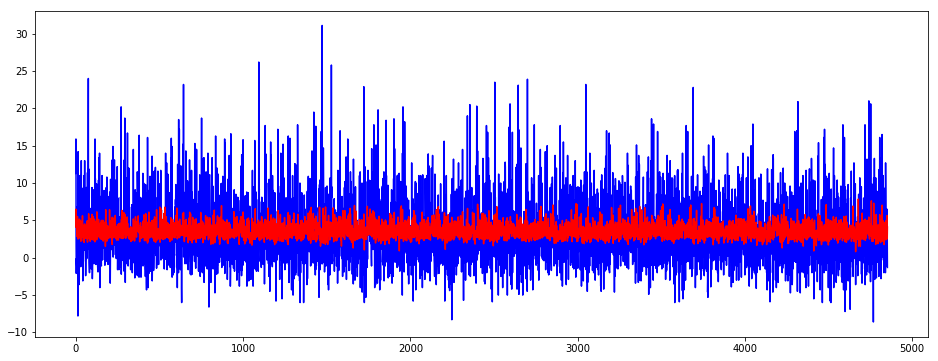

In [22]:
plt.figure(figsize=(16,6))
plt.plot(range(scores.shape[0]), scores, color='blue')
plt.plot(range(scores_pred.shape[0]), scores_pred, color='red')

In [23]:
pkl.dump(reg, open('/home/matheus/dev/tcc/tcc/modelo/nn1.pkl', 'wb'), -1)

In [24]:
# Predições - Carregar modelo treinado e dizer melhores jogadores para uma próxima rodada.

df_test = pd.read_csv('/home/matheus/dev/tcc/tcc/data/dados_agregados_limpos.csv')
df_test = df_test[df_test.ano == 2018]
reg = pkl.load(open('/home/matheus/dev/tcc/tcc/modelo/nn1.pkl', 'rb'))

In [25]:
def to_samples(df):
    df_samples = df[cols_info+cols_of_interest].copy()
    df_samples['ClubeID'] = df_samples['ClubeID'].map(dict_teams(to_int=True))
    df_samples['Posicao'] = df_samples['Posicao'].map(dict_positions(to_int=True))
    df_samples['variable'] = df_samples['variable'].map({'home.team':1, 'away.team':2})
    df_samples.reset_index(drop=True, inplace=True)
    return df_samples

In [26]:
def predict_best_players(df_samples, reg, n_players=11):
    samples = df_samples[df_samples.columns.difference(['AtletaID', 'Rodada', 'ano'])].values.astype(np.float64)

    pred = reg.predict(samples)
    best_indexes = pred.argsort()[-n_players:]
    return df_samples.iloc[best_indexes]

def predict_best_players_by_position(df_samples, reg, n_gol=5, n_zag=5, n_lat=5, n_mei=5, n_atk=5):
    df_result = pd.DataFrame(columns=df_samples.columns)
    for n_players, pos in zip([n_gol, n_zag, n_lat, n_mei, n_atk], range(1, 6)):
        samples = df_samples[df_samples['Posicao'] == pos]
        df_pos = predict_best_players(samples, reg, n_players)
        df_result = df_result.append(df_pos)

    return df_result

In [27]:
df_rodada = df_test[(df_test['Rodada'] == (ROUND_TO_PREDICT-1)) & (df_test['Status'] == "Provável")]
df_samples = to_samples(df_rodada)

df_samples['e'] = 1
print(df_samples.shape)

(139, 75)


In [28]:
df_players = predict_best_players(df_samples, reg, n_players=25)
df_rodada.iloc[df_players.index][['Apelido', 'Posicao', 'ClubeID']].sort_values('Posicao')

,Apelido,Posicao,ClubeID
24688,Gabriel,ata,Santos
24783,Willian,ata,Palmeiras
24633,Vitinho,ata,Flamengo
24657,Dudu,ata,Palmeiras
24736,Nico López,ata,Internacional
24701,Weverton,gol,Palmeiras
24841,Vanderlei,gol,Santos
24796,Iago,lat,Internacional
24670,Victor Ferraz,lat,Santos
24636,Renê,lat,Flamengo


In [29]:
df_players = predict_best_players_by_position(df_samples, reg, n_gol=1, n_zag=2, n_lat=2, n_mei=3, n_atk=3)
df_rodada.iloc[df_players.index][['Apelido', 'Posicao', 'ClubeID']]

,Apelido,Posicao,ClubeID
24841,Vanderlei,gol,Santos
24674,Pedro Geromel,zag,Grêmio
24827,Réver,zag,Flamengo
24636,Renê,lat,Flamengo
24656,Yago Pikachu,lat,Vasco
24666,Nikão,mei,Atlético-PR
24699,Zé Rafael,mei,Bahia
24832,Lucas Paquetá,mei,Flamengo
24633,Vitinho,ata,Flamengo
24736,Nico López,ata,Internacional
